<h1 style="font-size:50px; background-color:#87CEEB; color:black; padding:10px; font-family:'Helvetica'; text-align:center;font-weight:bold;">
  Loan Status Prediction
</h1>

In [1145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1146]:
train_df  = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

<h1 style="font-size:30px; background-color:#87CEEB; color:black; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Handling Null Values
</h1>

In [1148]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [1149]:
from sklearn.impute import SimpleImputer

num_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
imputer = SimpleImputer(strategy='median')
train_df[num_cols] = imputer.fit_transform(train_df[num_cols])
test_df[num_cols] = imputer.transform(test_df[num_cols])

In [1150]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in cat_cols:
    mode = train_df[col].mode()[0]
    train_df[col].fillna(mode, inplace=True)
    test_df[col].fillna(mode, inplace=True)

In [1151]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [1152]:
train_df['Dependents'] = train_df['Dependents'].str.replace('+', '', regex=False).astype(int)

test_df['Dependents'] = test_df['Dependents'].str.replace('+', '', regex=False).astype(int)

<h1 style="font-size:30px; background-color:#87CEEB; color:black; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Outlier Treatment
</h1>

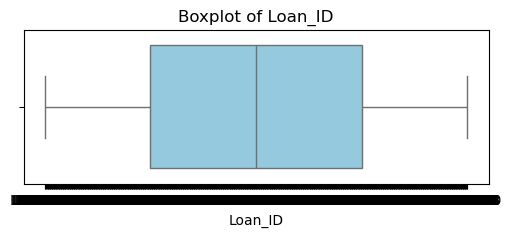

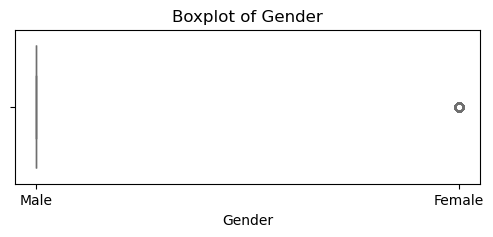

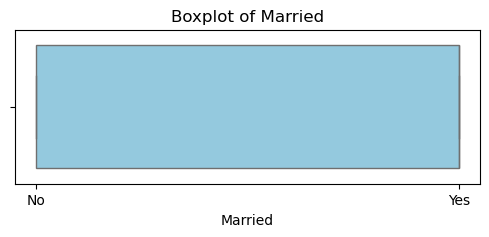

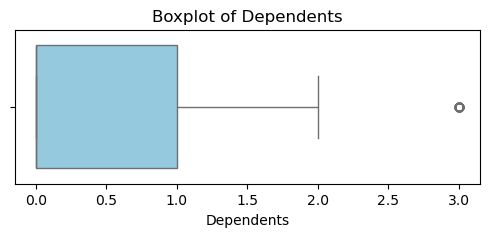

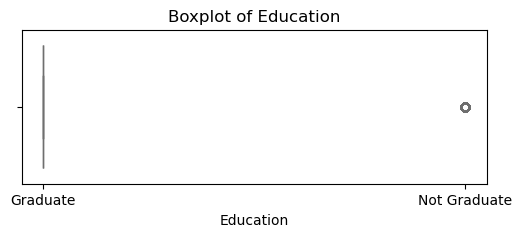

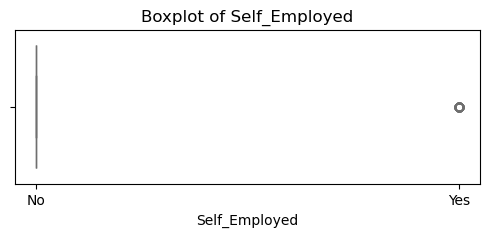

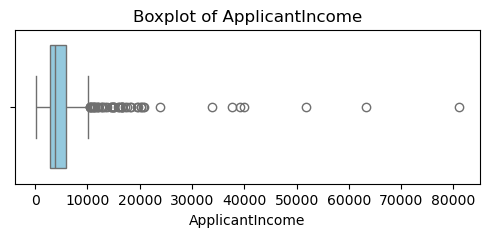

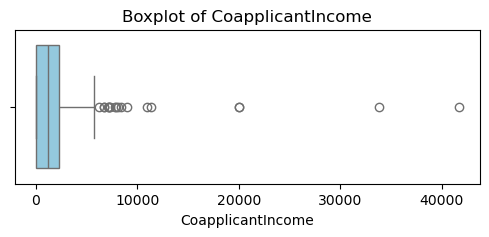

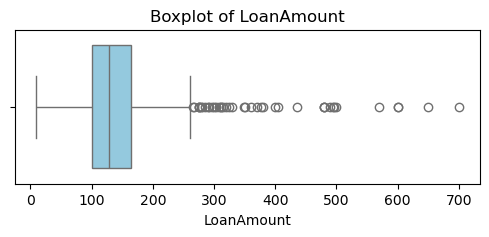

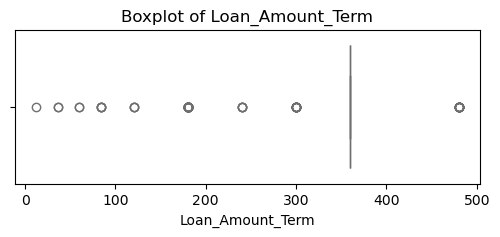

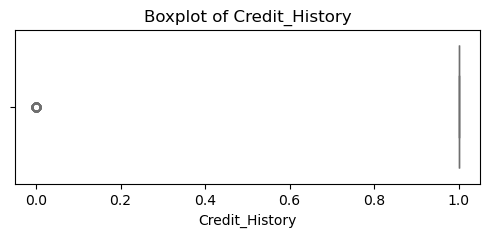

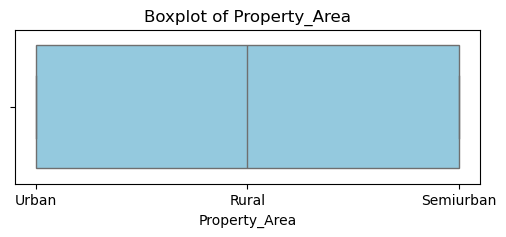

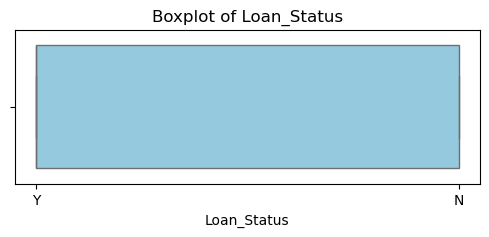

In [1154]:
col1 = train_df.columns
for i in col1:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=train_df[i], color='#87CEEB')
    plt.title(f'Boxplot of {i}')
    plt.show()

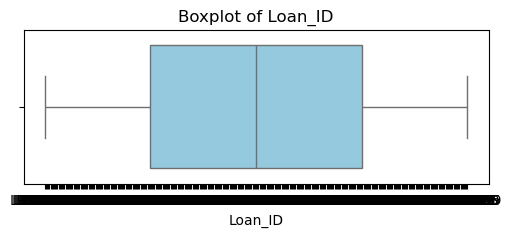

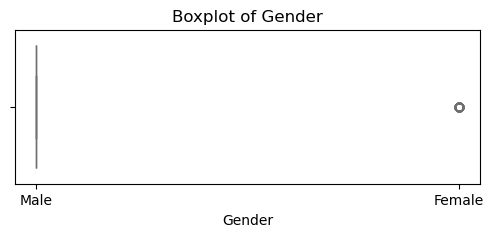

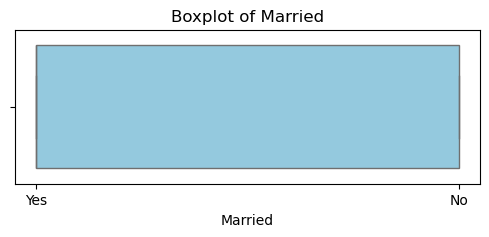

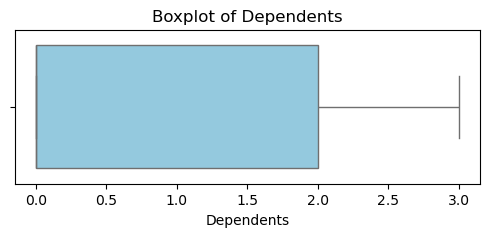

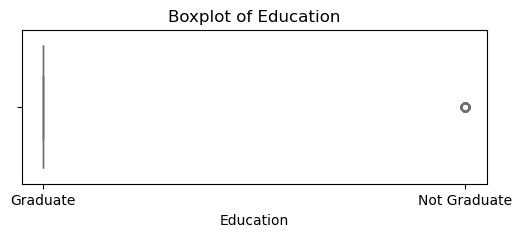

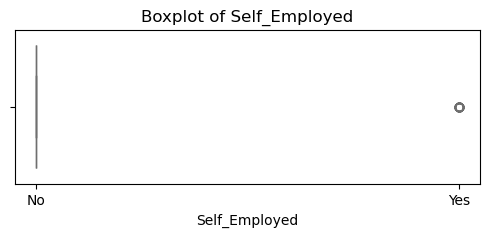

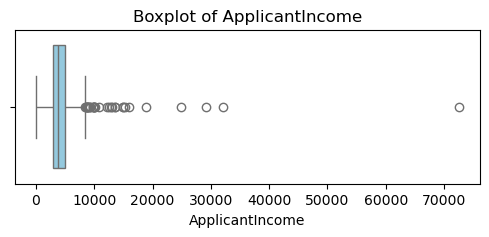

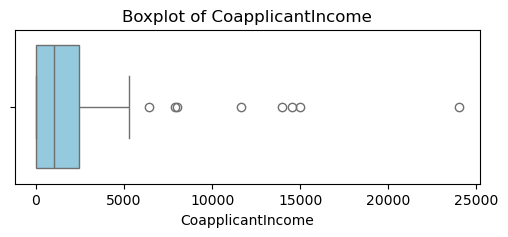

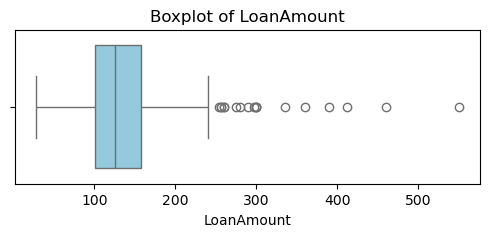

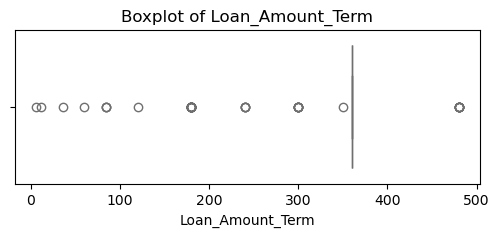

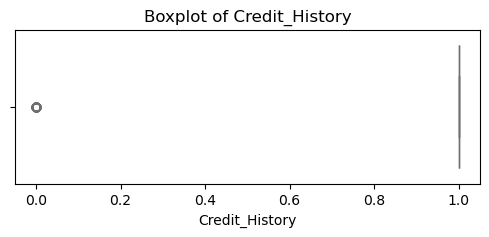

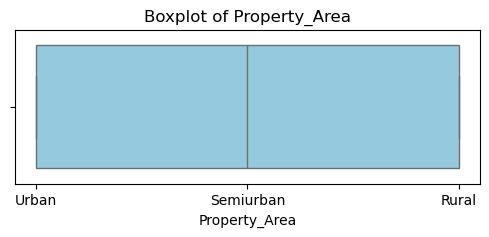

In [1155]:
col2 = test_df.columns
for i in col2:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=test_df[i], color='#87CEEB')
    plt.title(f'Boxplot of {i}')
    plt.show()

In [1156]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound, np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

In [1157]:
columns = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]

for i in columns:
    train_df = outliers(train_df,i)

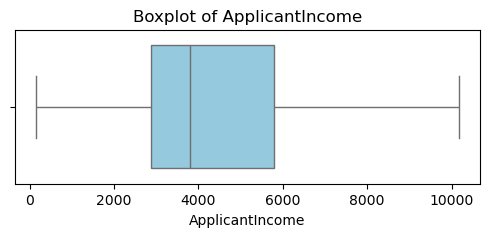

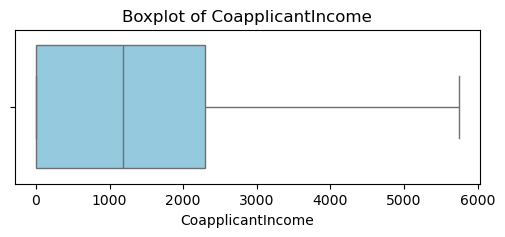

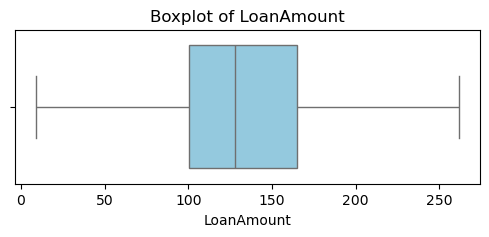

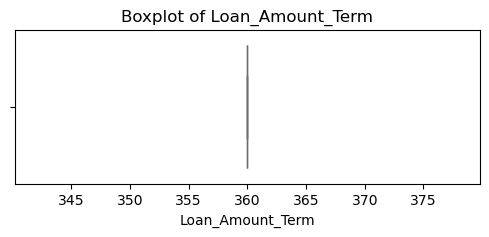

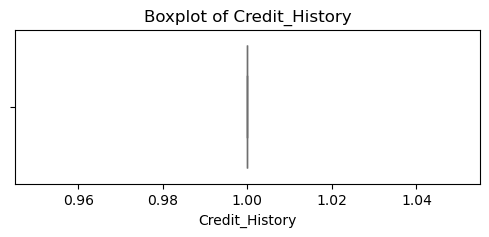

In [1158]:
for i in columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=train_df[i], color = '#87CEEB')
    plt.title(f'Boxplot of {i}')
    plt.show()

In [1159]:
columns = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
for i in columns:
    test_df = outliers(test_df,i)

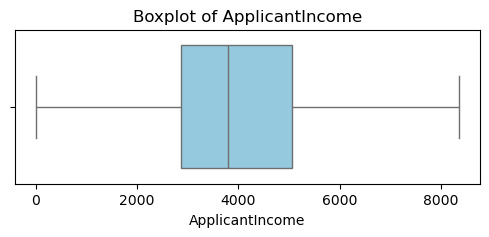

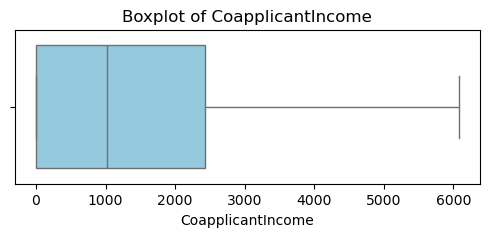

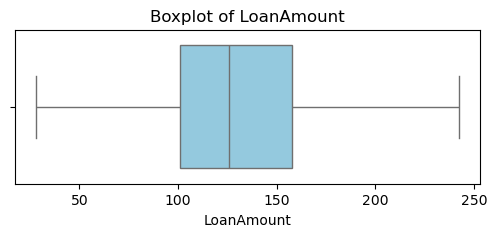

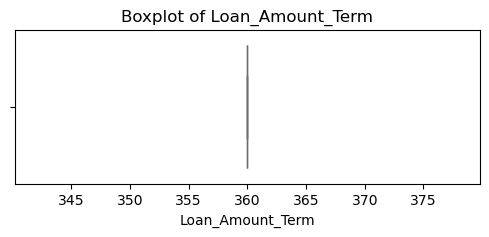

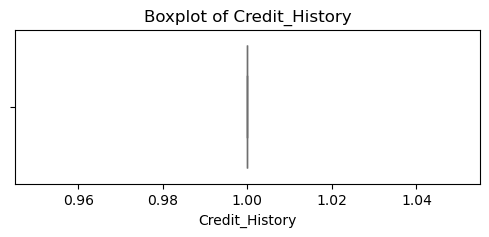

In [1160]:
for i in columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=test_df[i], color = '#87CEEB')
    plt.title(f'Boxplot of {i}')
    plt.show()

<h1 style="font-size:30px; background-color:#87CEEB; color:black; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Saving Preprocessed Data as Excel File
</h1>

In [1162]:
train_df.to_excel("project2_transformed_data.xlsx", index=False)

<h1 style="font-size:30px; background-color:#87CEEB; color:black; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Encoding
</h1>

In [1164]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1165]:
train_df['Gender'] = le.fit_transform(train_df['Gender'])
train_df['Married'] = le.fit_transform(train_df['Married'])
train_df['Education'] = le.fit_transform(train_df['Education'])
train_df['Self_Employed'] = le.fit_transform(train_df['Self_Employed'])
train_df['Property_Area'] = le.fit_transform(train_df['Property_Area'])
train_df['Loan_Status'] = le.fit_transform(train_df['Loan_Status'])

test_df['Gender'] = le.fit_transform(test_df['Gender'])
test_df['Married'] = le.fit_transform(test_df['Married'])
test_df['Education'] = le.fit_transform(test_df['Education'])
test_df['Self_Employed'] = le.fit_transform(test_df['Self_Employed'])
test_df['Property_Area'] = le.fit_transform(test_df['Property_Area'])

<h1 style="font-size:30px; background-color:#87CEEB; color:black; padding:10px; font-family:'Helvetica';font-weight:bold;">
  Skewness Analysis
</h1>

In [1167]:
train_df.drop('Loan_ID',axis=1).skew().sort_values(ascending=False)

Self_Employed        2.159796
Education            1.367622
ApplicantIncome      1.039846
Dependents           1.015551
CoapplicantIncome    1.012763
LoanAmount           0.683693
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area       -0.066196
Married             -0.644850
Loan_Status         -0.809998
Gender              -1.648795
dtype: float64

In [1168]:
train_df['ApplicantIncome_log'] = np.log1p(train_df['ApplicantIncome'])
train_df['CoapplicantIncome_log'] = np.log1p(train_df['CoapplicantIncome'])
train_df['LoanAmount_log'] = np.log1p(train_df['LoanAmount'])

In [1169]:
test_df.drop('Loan_ID',axis=1).skew().sort_values(ascending=False)

Self_Employed        2.662505
Education            1.295988
Dependents           0.938056
CoapplicantIncome    0.937228
ApplicantIncome      0.791645
LoanAmount           0.505095
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area       -0.147812
Married             -0.562582
Gender              -1.580809
dtype: float64

In [1170]:
test_df['ApplicantIncome_log'] = np.log1p(test_df['ApplicantIncome'])
test_df['CoapplicantIncome_log'] = np.log1p(test_df['CoapplicantIncome'])
test_df['LoanAmount_log'] = np.log1p(test_df['LoanAmount'])

In [1171]:
def my_model(model):
    global Training_score, Testing_score, F1_Score, Accuracy
    model.fit(xtrain,ytrain)
    yp=model.predict(xval)
    Training_score = model.score(xtrain,ytrain)
    Testing_score = model.score(xval,yval)
    F1_Score = f1_score(yval,yp, average = 'weighted')
    Accuracy = accuracy_score(yval,yp)
    print(classification_report(yval,yp))
    return model

In [1172]:
d = {"Model":[],"Training Score":[],"Testing Score":[],"F1 Score":[],"Accuracy":[]}
result = pd.DataFrame(d)
result

,Model,Training Score,Testing Score,F1 Score,Accuracy


In [1173]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score

In [1174]:
x = train_df.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_df['Loan_Status']

In [1175]:
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.2, random_state=42)

<h1 style="font-size:30px; background-color:#87CEEB; color:white; padding:10px; text-align:center;font-family:'Helvetica';font-weight:bold;">
  Logistic Regression Model
</h1>

In [1177]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
my_model(lr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      0.99      0.78        80

    accuracy                           0.64       123
   macro avg       0.32      0.49      0.39       123
weighted avg       0.42      0.64      0.51       123



LogisticRegression()

In [1178]:
from sklearn.model_selection import GridSearchCV

In [1179]:
logreg_params = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "saga"],
    "max_iter": [100, 200]
    }

In [1180]:
grid_logreg = GridSearchCV(LogisticRegression(),logreg_params,cv=5,verbose=3)

In [1181]:
grid_logreg.fit(xtrain,ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END C=0.01, max_iter=100, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l1, solver=liblinear;, score=0.684 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l1, solver=liblinear;, score=0.704 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.697 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.704 total time= 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [1182]:
grid_logreg.best_estimator_

LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [1183]:
my_model(LogisticRegression(C=0.01, penalty='l1', solver='saga'))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [1184]:
re = pd.DataFrame([["Logistic Regression",Training_score,Testing_score,F1_Score, Accuracy]],columns=result.columns)

In [1185]:
result = pd.concat([result, re], ignore_index=True)
result

,Model,Training Score,Testing Score,F1 Score,Accuracy
0,Logistic Regression,0.696538,0.650407,0.512636,0.650407


<h1 style="font-size:30px; background-color:#87CEEB; color:white; padding:10px; text-align:center;font-family:'Helvetica';font-weight:bold;">
  Decision Tree	 Model
</h1>

In [1187]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
my_model(dt)

              precision    recall  f1-score   support

           0       0.37      0.35      0.36        43
           1       0.66      0.68      0.67        80

    accuracy                           0.56       123
   macro avg       0.51      0.51      0.51       123
weighted avg       0.56      0.56      0.56       123



DecisionTreeClassifier()

In [1188]:
dt_params = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : range(1,10),
    "min_samples_leaf":range(1,10)
    }

In [1189]:
grid_dt = GridSearchCV(DecisionTreeClassifier(),dt_params,cv=5,verbose=3)

In [1190]:
grid_dt.fit(xtrain,ytrain)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1;, score=0.697 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1;, score=0.694 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1;, score=0.694 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1;, score=0.694 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1;, score=0.704 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.697 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.694 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.694 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.694 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.704 total time=   0.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)},
             verbose=3)

In [1191]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [1192]:
my_model(DecisionTreeClassifier(max_depth=1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



DecisionTreeClassifier(max_depth=1)

In [1193]:
re = pd.DataFrame([["Decision Tree",Training_score,Testing_score,F1_Score, Accuracy]],columns=result.columns)

In [1194]:
result = pd.concat([result, re], ignore_index=True)
result

,Model,Training Score,Testing Score,F1 Score,Accuracy
0,Logistic Regression,0.696538,0.650407,0.512636,0.650407
1,Decision Tree,0.696538,0.650407,0.512636,0.650407


<h1 style="font-size:30px; background-color:#87CEEB; color:white; padding:10px; text-align:center;font-family:'Helvetica';font-weight:bold;">
  K-Nearest Neighbors	 Model
</h1>

In [1196]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
my_model(knn)

              precision    recall  f1-score   support

           0       0.32      0.19      0.24        43
           1       0.64      0.79      0.71        80

    accuracy                           0.58       123
   macro avg       0.48      0.49      0.47       123
weighted avg       0.53      0.58      0.54       123



KNeighborsClassifier()

In [1197]:
knn_params = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [1198]:
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=3, n_jobs=-1)

In [1199]:
grid_knn.fit(xtrain, ytrain)

Fitting 5 folds for each of 76 candidates, totalling 380 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [1200]:
grid_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [1201]:
my_model(KNeighborsClassifier(metric='manhattan', n_neighbors=9))

              precision    recall  f1-score   support

           0       0.15      0.05      0.07        43
           1       0.63      0.86      0.73        80

    accuracy                           0.58       123
   macro avg       0.39      0.45      0.40       123
weighted avg       0.46      0.58      0.50       123



KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [1202]:
re = pd.DataFrame([["K-Nearest Neighbors",Training_score,Testing_score,F1_Score, Accuracy]],columns=result.columns)

In [1203]:
result = pd.concat([result, re], ignore_index=True)
result

,Model,Training Score,Testing Score,F1 Score,Accuracy
0,Logistic Regression,0.696538,0.650407,0.512636,0.650407
1,Decision Tree,0.696538,0.650407,0.512636,0.650407
2,K-Nearest Neighbors,0.733198,0.577236,0.497371,0.577236


<h1 style="font-size:30px; background-color:#87CEEB; color:white; padding:10px; text-align:center;font-family:'Helvetica';font-weight:bold;">
  Naive Bayes Model
</h1>

In [1205]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
my_model(nb)

              precision    recall  f1-score   support

           0       0.50      0.05      0.09        43
           1       0.66      0.97      0.78        80

    accuracy                           0.65       123
   macro avg       0.58      0.51      0.43       123
weighted avg       0.60      0.65      0.54       123



GaussianNB()

In [1206]:
gnb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

In [1207]:
grid_gnb = GridSearchCV(GaussianNB(), gnb_params, cv=5, verbose=3, n_jobs=-1)

In [1208]:
grid_gnb.fit(xtrain, ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             verbose=3)

In [1209]:
grid_gnb.best_estimator_

GaussianNB(var_smoothing=1e-06)

In [1210]:
my_model(GaussianNB(var_smoothing=1e-07))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



GaussianNB(var_smoothing=1e-07)

In [1211]:
re = pd.DataFrame([["Naive Bayes",Training_score,Testing_score,F1_Score, Accuracy]],columns=result.columns)

In [1212]:
result = pd.concat([result, re], ignore_index=True)
result

,Model,Training Score,Testing Score,F1 Score,Accuracy
0,Logistic Regression,0.696538,0.650407,0.512636,0.650407
1,Decision Tree,0.696538,0.650407,0.512636,0.650407
2,K-Nearest Neighbors,0.733198,0.577236,0.497371,0.577236
3,Naive Bayes,0.696538,0.650407,0.512636,0.650407


<h1 style="font-size:30px; background-color:#87CEEB; color:white; padding:10px; text-align:center;font-family:'Helvetica';font-weight:bold;">
  Random Forest Model
</h1>

In [1214]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
my_model(RFC)

              precision    recall  f1-score   support

           0       0.27      0.07      0.11        43
           1       0.64      0.90      0.75        80

    accuracy                           0.61       123
   macro avg       0.46      0.48      0.43       123
weighted avg       0.51      0.61      0.53       123



RandomForestClassifier()

In [1215]:
rf_params = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : range(1,10),
    "min_samples_leaf":range(1,10)
    }

In [1216]:
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=3, verbose=3, n_jobs=-1)

In [1217]:
grid_rf.fit(xtrain, ytrain)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)},
             verbose=3)

In [1218]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=6)

In [1219]:
my_model(RandomForestClassifier(max_depth=5, min_samples_leaf=3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



RandomForestClassifier(max_depth=5, min_samples_leaf=3)

In [1220]:
re = pd.DataFrame([["Random Forest",Training_score,Testing_score,F1_Score, Accuracy]],columns=result.columns)

In [1221]:
result = pd.concat([result, re], ignore_index=True)
result

,Model,Training Score,Testing Score,F1 Score,Accuracy
0,Logistic Regression,0.696538,0.650407,0.512636,0.650407
1,Decision Tree,0.696538,0.650407,0.512636,0.650407
2,K-Nearest Neighbors,0.733198,0.577236,0.497371,0.577236
3,Naive Bayes,0.696538,0.650407,0.512636,0.650407
4,Random Forest,0.723014,0.650407,0.512636,0.650407


<h1 style="font-size:30px; background-color:#87CEEB; color:white; padding:10px; text-align:center;font-family:'Helvetica';font-weight:bold;">
  XGBoost Model
</h1>

In [1223]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
my_model(XGB)

              precision    recall  f1-score   support

           0       0.43      0.28      0.34        43
           1       0.67      0.80      0.73        80

    accuracy                           0.62       123
   macro avg       0.55      0.54      0.53       123
weighted avg       0.59      0.62      0.59       123



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [1224]:
xgb_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0]
}

In [1225]:
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5, verbose=3, n_jobs=-1)

In [1226]:
grid_xgb.fit(xtrain, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100],
                         'subsample': [0.7, 1.0]},
             verbose=3)

In [1227]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [1228]:
my_model = XGBClassifier(
    base_score=0.5, booster='gbtree', callbacks=None,
    colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
    early_stopping_rounds=None, enable_categorical=False,
    eval_metric='logloss', gamma=0, gpu_id=-1,
    grow_policy='depthwise', importance_type=None,
    interaction_constraints='', learning_rate=0.1, max_bin=256,
    max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
    min_child_weight=1, missing=None, monotone_constraints='()',
    n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
    random_state=0, reg_alpha=0, reg_lambda=1)


In [1229]:
re = pd.DataFrame([["XGBoost",Training_score,Testing_score,F1_Score, Accuracy]],columns=result.columns)

In [1230]:
result = pd.concat([result, re], ignore_index=True)
result

,Model,Training Score,Testing Score,F1 Score,Accuracy
0,Logistic Regression,0.696538,0.650407,0.512636,0.650407
1,Decision Tree,0.696538,0.650407,0.512636,0.650407
2,K-Nearest Neighbors,0.733198,0.577236,0.497371,0.577236
3,Naive Bayes,0.696538,0.650407,0.512636,0.650407
4,Random Forest,0.723014,0.650407,0.512636,0.650407
5,XGBoost,0.995927,0.617886,0.593898,0.617886


In [1231]:
def highlight_xgboost(row):
    return ['background-color: #87CEEB' if row['Model'] == 'Random Forest' else '' for _ in row]

result.style.apply(highlight_xgboost, axis=1)

,Model,Training Score,Testing Score,F1 Score,Accuracy
0,Logistic Regression,0.696538,0.650407,0.512636,0.650407
1,Decision Tree,0.696538,0.650407,0.512636,0.650407
2,K-Nearest Neighbors,0.733198,0.577236,0.497371,0.577236
3,Naive Bayes,0.696538,0.650407,0.512636,0.650407
4,Random Forest,0.723014,0.650407,0.512636,0.650407
5,XGBoost,0.995927,0.617886,0.593898,0.617886


<div style="text-align:left; color:#87CEEB; font-family:'Helvetica'; font-size:30px;text-align:center;font-weight:bold;">
  <b>
    ⚡Best Final Model: Random Forest
  </b>
</div>

In [1233]:
xtest = test_df.drop(columns=['Loan_ID'])

test_preds = RFC.predict(xtest)

In [1234]:
output = pd.DataFrame({
    'Loan_ID': test_df['Loan_ID'],
    'Loan_Status': ['Y' if i == 1 else 'N' for i in test_preds]
})
output.to_excel("test_data_final.xlsx", index=False)